In [86]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import timeline_drawer
from datetime import datetime
import time
# transpile
from qiskit.transpiler import InstructionDurations, PassManager
from qiskit.transpiler.passes import DynamicalDecoupling, Unroller, ALAPSchedule, LookaheadSwap, BasicSwap
#RB
import numpy as np
from qiskit_experiments.library import randomized_benchmarking as rb
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils
from qiskit_experiments.library.randomized_benchmarking.rb_experiment_dd import StandardRB_dd
from qiskit_experiments.library import StandardRB, InterleavedRB
import qiskit.circuit.library as circuits
from qiskit.circuit import Delay, Instruction
from qiskit.circuit.library.standard_gates import RXXGate, RZZGate, RZXGate, XGate, SXGate, IGate, CCXGate, SGate, CXGate
from qiskit_experiments.library.randomized_benchmarking.double_interleaved_rb_experiment import DoubleInterleavedRB


In [2]:
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='qamp', project='spring-22-17')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='qamp', project='spring-22-17-2')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='internal', project='reservations')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='squirl')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>]

In [12]:
provider=IBMQ.providers()[2]
#provider = IBMQ.get_provider(hub='ibm-q-community', group='qamp', project='spring-22-17')
#backend=provider.backend.ibmq_lima
backend = provider.get_backend('ibmq_lima')

# get the basic feautures including qubit number of the backend.
config = backend.configuration()
backend_job_limit=backend.job_limit()

print("{0} is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}.{6} are the list of connected qubits."
      "{7} can handle maximum {8} circuits(experiments) per job."
      "Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is {9}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map,
               config.backend_name,
               config.max_experiments,
               backend_job_limit.maximum_jobs))

ibmq_lima is on version 1.0.36. It has 5 qubits. It does not support OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]] are the list of connected qubits.ibmq_lima can handle maximum 100 circuits(experiments) per job.Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is None.


In [87]:
lengths = np.arange(1, 20, 5)
num_samples = 3
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed)


ibmq_lima
2022-06-26 12:36:39.103650


In [88]:
cir=exp1.circuits()[0].draw(output='mpl')
transpile(cir,backend)


AttributeError: 'Figure' object has no attribute 'name'

In [9]:
basis_gates=backend.configuration().basis_gates

In [10]:
coupling_map=backend.configuration().coupling_map
print(coupling_map)

[[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]


# 2q : need to make pulse dd sequence corresponding to the single qubit gate length

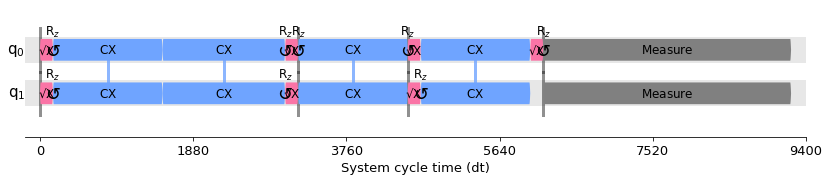

In [36]:
dd_sequence=[XGate(),XGate()]
durations=InstructionDurations.from_backend(backend)
pm=PassManager([ALAPSchedule(durations),DynamicalDecoupling(durations, dd_sequence)])
c_dd=pm.run(c_trnaspile)
timeline_drawer(c_dd)


In [91]:
lengths = [1,2,3]
num_samples = 3
seed = 1010
qubits = [0,1,2]

exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)

In [92]:
def DD_added_RB_circuits(exp):
    circ=exp.circuits()
    dd_sequence=[XGate(),XGate(),XGate(),XGate()]
    durations=InstructionDurations.from_backend(backend)
    pm=PassManager([ALAPSchedule(durations), DynamicalDecoupling(durations, dd_sequence)])
    exp_transpiled=[]
    for i in circ:
        transpiled=transpile(i,backend)
        dd=pm.run(transpiled)
        exp_transpiled.append(dd)
    return exp_transpiled



# need to change the circuits into StandardRB object which can be 'run'

In [93]:
DD_added_RB_circuits(exp1)

In [65]:
lengths = np.arange(1, 20, 5)
num_samples = 3
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1=exp1_transpiled
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)


ibmq_lima
2022-06-26 11:30:43.825206


AttributeError: 'list' object has no attribute 'run'

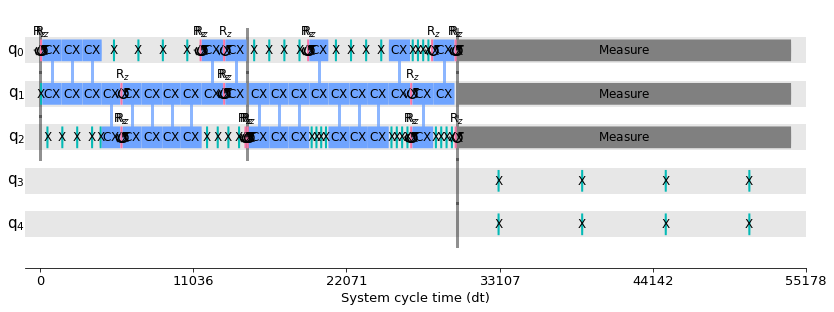

In [60]:
timeline_drawer(exp1_transpiled[0])

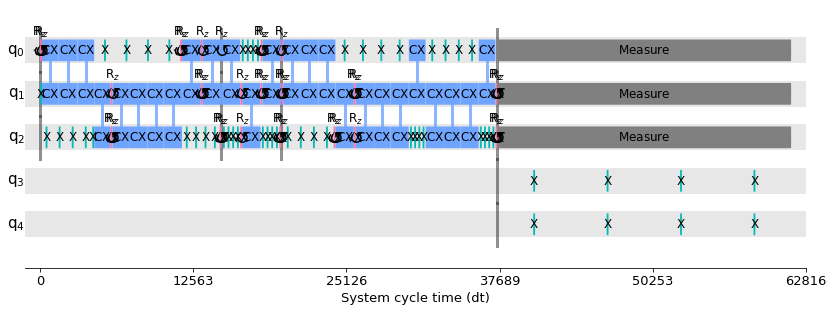

In [61]:
timeline_drawer(exp1_transpiled[1])

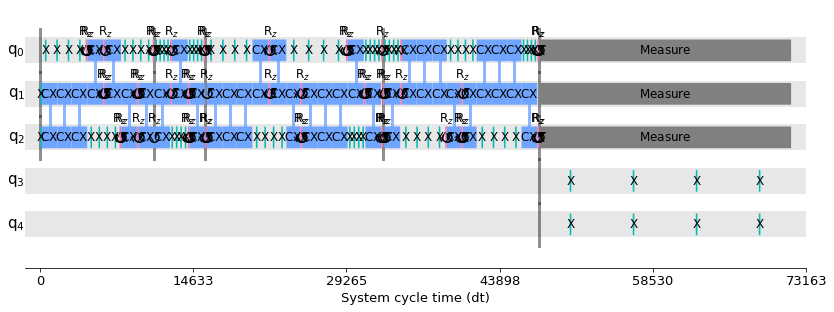

In [62]:
timeline_drawer(exp1_transpiled[2])

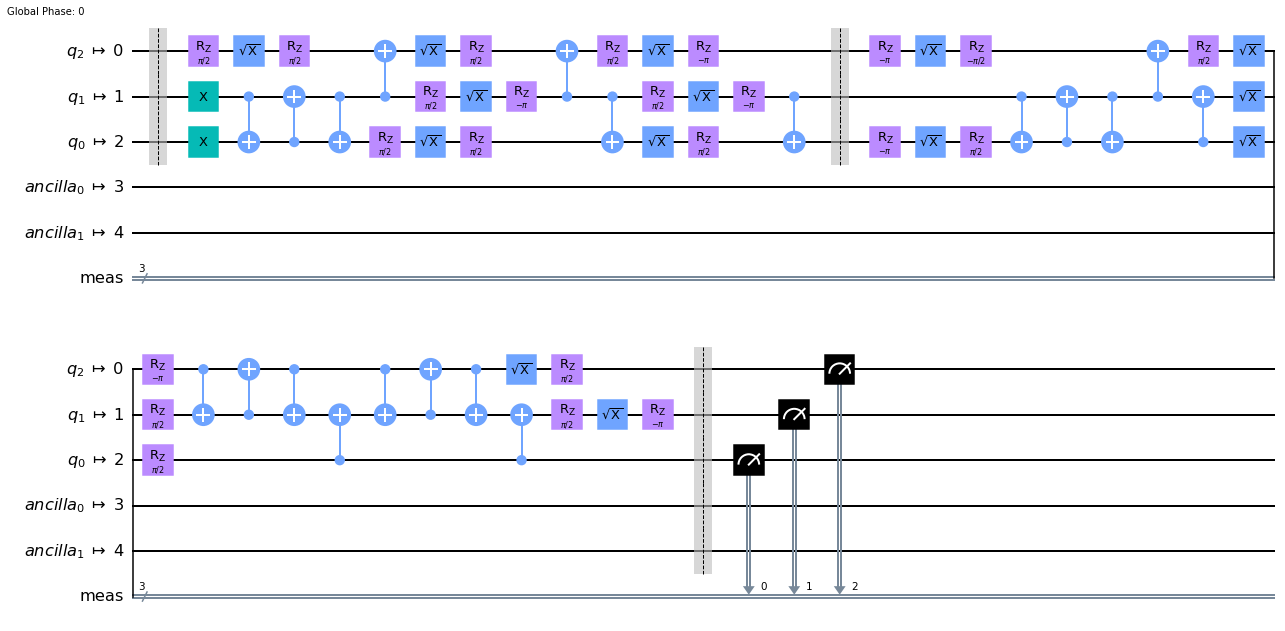

In [73]:
circ=exp1.circuits()[0]
c_trnaspile=transpile(circ, backend)
c_trnaspile.draw(output='mpl')

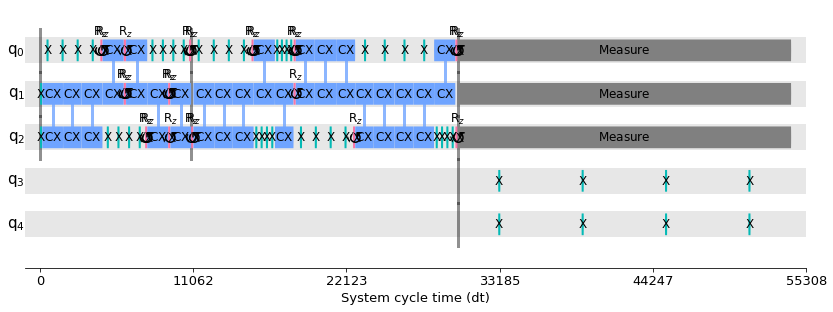

In [18]:
dd_sequence=[XGate(),XGate(),XGate(),XGate()]
durations=InstructionDurations.from_backend(backend)
pm=PassManager([ALAPSchedule(durations), DynamicalDecoupling(durations, dd_sequence)])
dd=pm.run(c_trnaspile)
timeline_drawer(dd)